In [1]:
import cv2
import numpy as np
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

In [2]:
# Load the image
image_path = r'D:/HiWi-1/spheres/spheres/Images/1.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Image not found. Please check the path.")

In [3]:
# Preprocessing
# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

In [4]:
# Instead of a fixed threshold, we use Otsu's method to find an optimal threshold value
# This might help in case the direct thresholding is not yielding good results
# If Otsu's method does not work well, consider trying adaptive thresholding
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [5]:
# It might be beneficial to perform some morphological operations to clean up the image
# For example, removing small white spots or connecting small breaks in particles
kernel = np.ones((3,3), np.uint8)
# Remove small white spots (noise)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

In [6]:
# Label connected components
label_image = label(cleaned)


In [7]:
# Initialize a list to hold the masks for individual particles
masks = []


In [8]:
# Iterate over each detected particle and create masks
for region in regionprops(label_image):
    # Skip small regions that might be noise
    if region.area < 50:  # Adjust this value based on your needs
        continue

    # Create a blank mask for each particle
    mask = np.zeros_like(image)
    
    # Fill the mask where the particle is
    for coordinates in region.coords:
        mask[coordinates[0], coordinates[1]] = 255  # Fill with white
    
    masks.append(mask)  # Store the mask

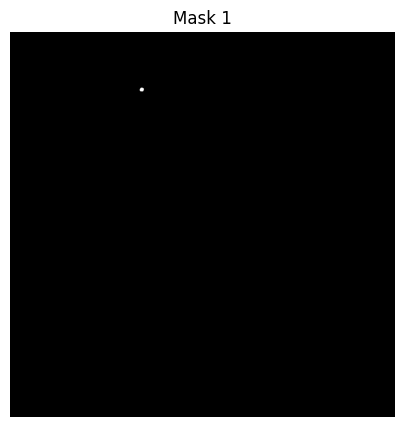

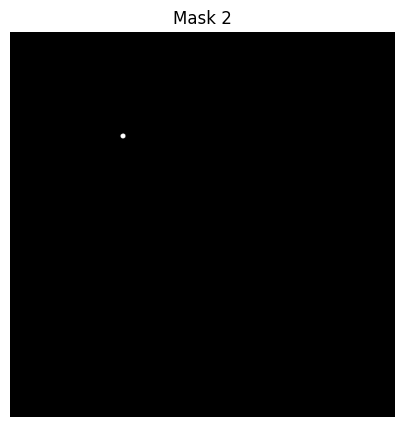

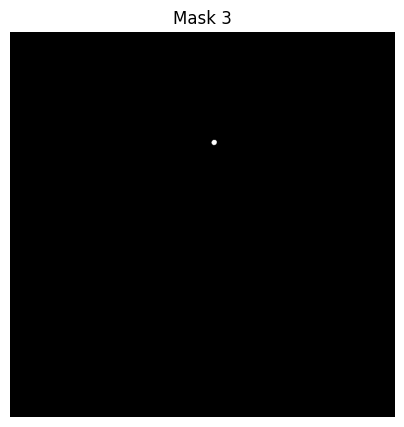

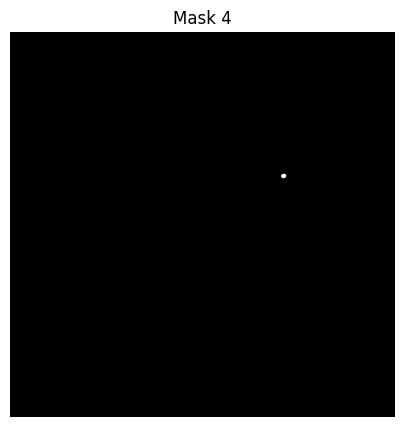

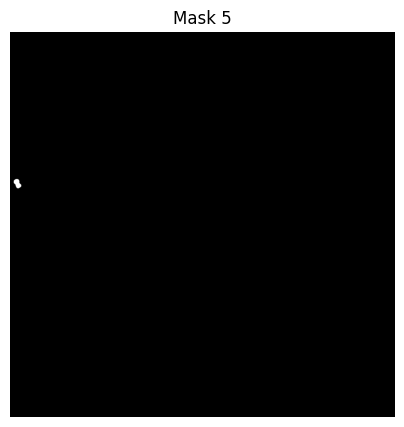

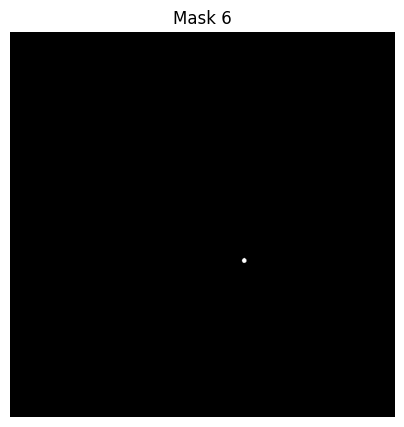

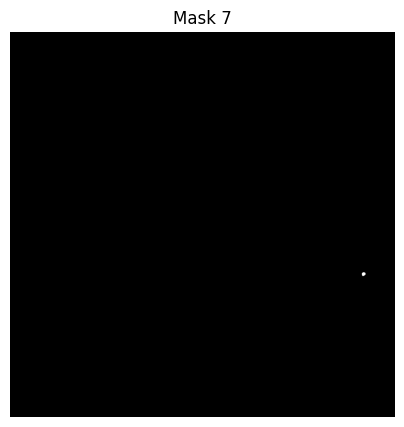

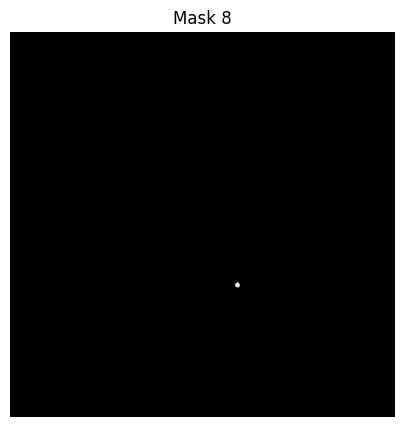

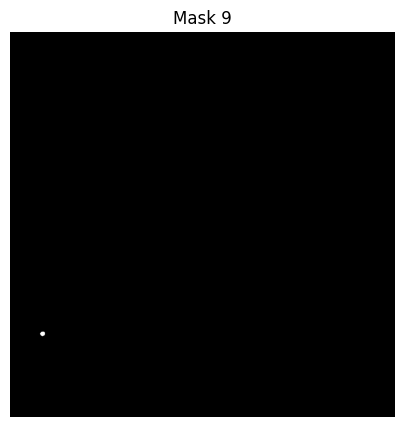

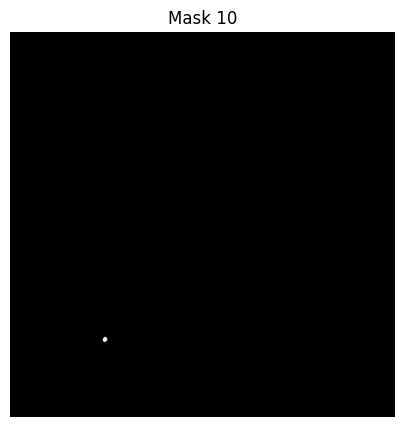

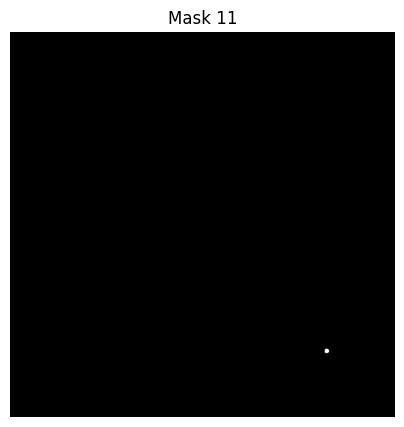

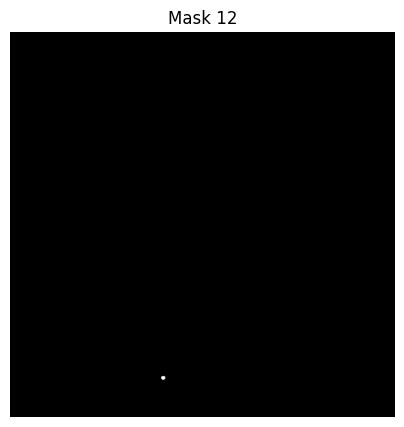

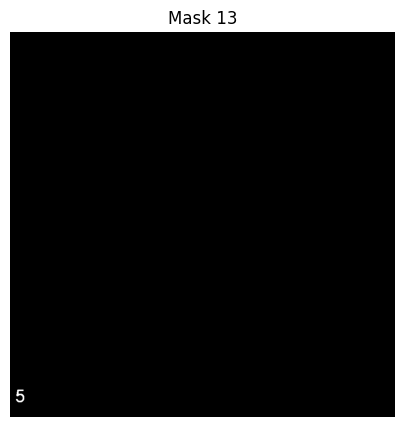

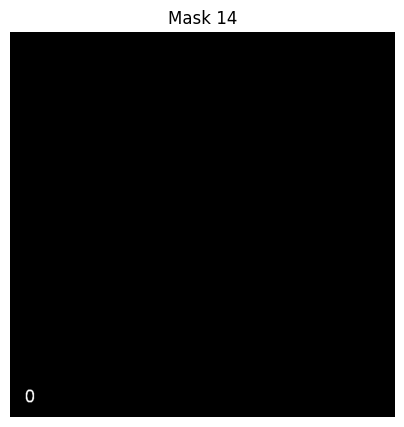

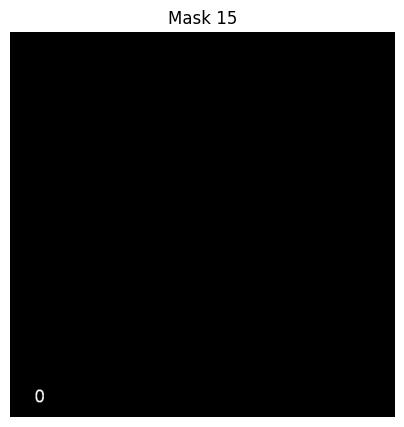

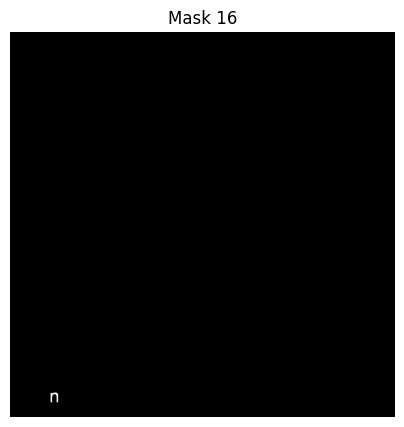

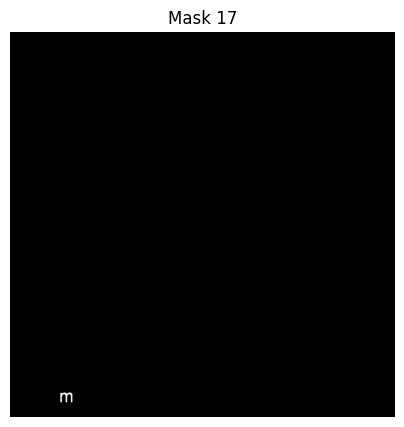

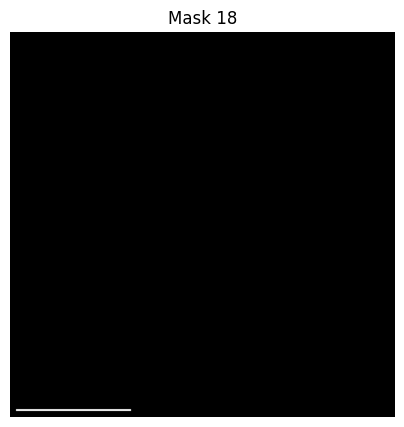

In [9]:
# Optionally, display or save the masks
for i, mask in enumerate(masks, 1):
    plt.figure(figsize=(5, 5))
    plt.imshow(mask, cmap='gray')
    plt.title(f'Mask {i}')
    plt.axis('off')
    plt.show()